모집단을 완전히 알고 있다는 전제하에 모집단에서 표본추출의 시뮬레이션을 해보겠습니다.

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%precision 3

'%.3f'

In [2]:
fish_5 = np.array([2,3,4,5,6])
fish_5

array([2, 3, 4, 5, 6])

In [3]:
# 무작위 추출
np.random.choice(fish_5, size=1, replace=False)

array([3])

In [4]:
np.random.choice(fish_5, size=3, replace=False)

array([2, 5, 6])

In [5]:
# 난수 시드 지정 (같은 표본 추출 반복 가능)
np.random.seed(1)
np.random.choice(fish_5, size=3, replace=False)

array([4, 3, 6])

In [7]:
np.random.seed(1)
np.random.choice(fish_5, size=3, replace=False)

array([4, 3, 6])

In [9]:
# 무작위 추출 표본으로부터 표본 평균값 계산
np.random.seed(1)
np.mean(np.random.choice(fish_5, size=3, replace=False))

4.333333333333333

### 난수
난수는 랜덤으로 골라낸 값을 의미합니다. 분야에 따라 확률변수와 같은 의미로 사용되기도 합니다.

In [10]:
fish_100000 = pd.read_csv("./sample/3-4-1-fish_length_100000.csv")["length"]
fish_100000.head()

0    5.297442
1    3.505566
2    3.572546
3    3.135979
4    4.689275
Name: length, dtype: float64

In [11]:
len(fish_100000)

100000

In [12]:
sampling_result = np.random.choice(fish_100000, size=10, replace=False)
sampling_result

array([4.091, 5.465, 3.426, 4.287, 4.244, 4.282, 4.29 , 5.087, 2.769,
       5.296])

In [13]:
np.mean(sampling_result)

4.3235970793805025

### 모집단 분포

In [14]:
# 모평균
np.mean(fish_100000)

4.000000000000001

In [15]:
# 모표준편차
np.std(fish_100000, ddof=0)

0.7999999999999999

In [16]:
# 모분산
np.var(fish_100000, ddof=0)

0.6399999999999999

<AxesSubplot:xlabel='length', ylabel='Count'>

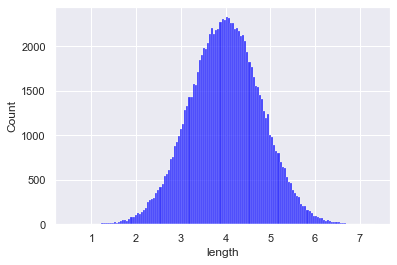

In [19]:
sns.histplot(fish_100000, kde=False, color="blue")

In [20]:
# 모집단분포와 정규분포 간 확률밀도함수 비교
x = np.arange(start=1, stop=7.1, step=0.1)
x

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ])

In [21]:
stats.norm.pdf(x=x, loc=4, scale=0.8) # loc = 평균, scale = 표준편차

array([4.407e-04, 6.988e-04, 1.091e-03, 1.676e-03, 2.536e-03, 3.778e-03,
       5.540e-03, 7.998e-03, 1.137e-02, 1.591e-02, 2.191e-02, 2.971e-02,
       3.967e-02, 5.215e-02, 6.749e-02, 8.598e-02, 1.078e-01, 1.332e-01,
       1.619e-01, 1.938e-01, 2.283e-01, 2.648e-01, 3.025e-01, 3.401e-01,
       3.764e-01, 4.102e-01, 4.401e-01, 4.648e-01, 4.833e-01, 4.948e-01,
       4.987e-01, 4.948e-01, 4.833e-01, 4.648e-01, 4.401e-01, 4.102e-01,
       3.764e-01, 3.401e-01, 3.025e-01, 2.648e-01, 2.283e-01, 1.938e-01,
       1.619e-01, 1.332e-01, 1.078e-01, 8.598e-02, 6.749e-02, 5.215e-02,
       3.967e-02, 2.971e-02, 2.191e-02, 1.591e-02, 1.137e-02, 7.998e-03,
       5.540e-03, 3.778e-03, 2.536e-03, 1.676e-03, 1.091e-03, 6.988e-04,
       4.407e-04])

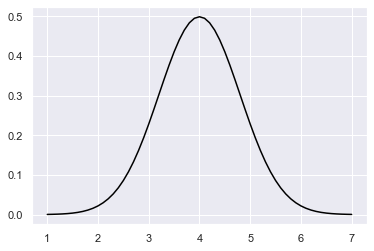

In [22]:
plt.plot(x, stats.norm.pdf(x=x, loc=4, scale=0.8), color="black")

C:\Users\HYUNJUN\anaconda3\envs\deep-learning-gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


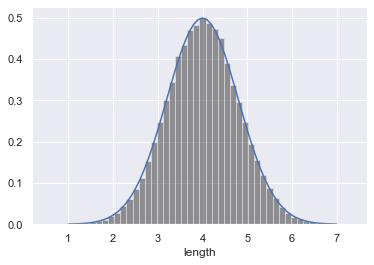

In [27]:
sns.distplot(fish_100000, kde=False, norm_hist=True, color="black")
plt.plot(x, stats.norm.pdf(x=x, loc=4, scale=0.8))

In [28]:
# 표본을 얻는 절차의 추상화
sampling_norm = stats.norm.rvs(loc=4, scale=0.8, size=10)
sampling_norm

array([4.037, 3.498, 4.322, 5.295, 5.499, 2.905, 4.437, 4.665, 3.786,
       4.569])

In [29]:
np.mean(sampling_norm)

4.301401664573935